In [21]:
include(joinpath("..","src","setup.jl"))

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$width
[1] 800

$rcalljl_options$height
[1] 400




In [22]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

# just a guess for now, think through this, and the specific inhibition function
# later, if using N works out
params[:W_m_σ_N] = 3

3

In [72]:
params[:Δf] = 6

6

In [73]:
result = bistable_model(100,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                        intermediate_results=true);


┌ Info: 1.04% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


In [74]:
result.percepts.counts

([1.2, 1.92, 1.92, 0.96, 4.32, 0.96, 1.44, 11.76, 10.08, 4.32, 8.64], Bool[true, false, true, false, true, false, true, false, true, false, true])

In [66]:
rplot(result.primary_source)

ErrorException: type Array has no field primary_source

In [25]:
cmask = decompress(compress(result.primary_source));

┌ Warning: `indices(a, d)` is deprecated, use `axes(a, d)` instead.
│   caller = raster_plot(::AxisArray{Float64,2,Array{Float64,2},Tuple{Axis{:time,StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}}}}},Axis{:col,Base.OneTo{Int64}}}}) at rplots.jl:20
└ @ ShammaModel /Users/davidlittle/.julia/packa

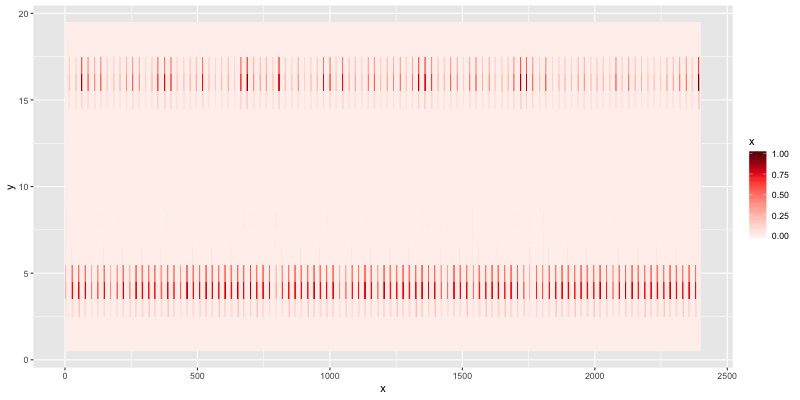

RObject{VecSxp}


In [26]:
ShammaModel.raster_plot(cmask)

In [27]:
comp = compress(result.primary_source)

AuditoryBistabilityLE.CompressedMask{StepRangeLen{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}}},Base.TwicePrecision{Quantity{Float64,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)},Unitful.FreeUnits{(Unitful.Unit{:Second,Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}(0, 1//1),),Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)}}}}}}((2400, 19), 0.02 s:0.02 s:48.0 s, UInt8[0x78, 0x9c, 0xed, 0x5d, 0xfb, 0x53, 0x94, 0xd7, 0x19, 0x5e  …  0x08, 0x08, 0xcc, 0x0d, 0xfc, 0x07, 0x98, 0x36, 0x52, 0x87])

In [29]:
sizeof(comp.data)

3556

In [30]:
length(comp.data)

3556

In [31]:
sizeof(result.primary_source.val.data)/sizeof(comp.data)

102.58717660292463

# Plans

I've verrified that this compression will lead to practical file sizes. So I can store the entire mask in my results allowing me to adjust how I evaluate the models after running the larger simulation.

I now need to verify that the computation of the ratio and the percepts remains essentially the same with this compression. Then I can start running test simulations with count_lengths.jl and run on MARCC by tomorrow (Wed 10/3).

In [32]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0
params[:W_m_σ_N] = 3

3

In [33]:
result = []
for d in [3,6,12]
    @show d
    params[:Δf] = d
    push!(result,bistable_model(15,params,joinpath(srcdir,"settings.toml"),progressbar=false,
                                intermediate_results=true))
end

alert()

d = 3


┌ Info: 4.17% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 6
d = 12


Process(`osascript -e 'display notification "Done!" with title "Julia"'`, ProcessExited(0))

In [69]:
result[1].percepts.counts[2]

1-element Array{Bool,1}:
 false

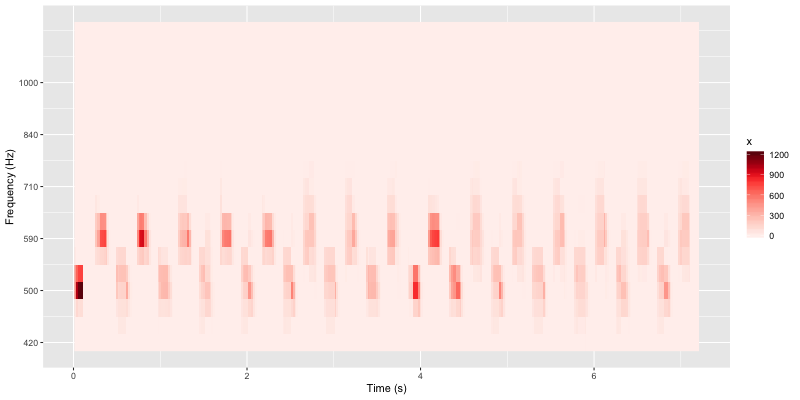

RObject{VecSxp}


In [34]:
rplot(result[1].primary_source)

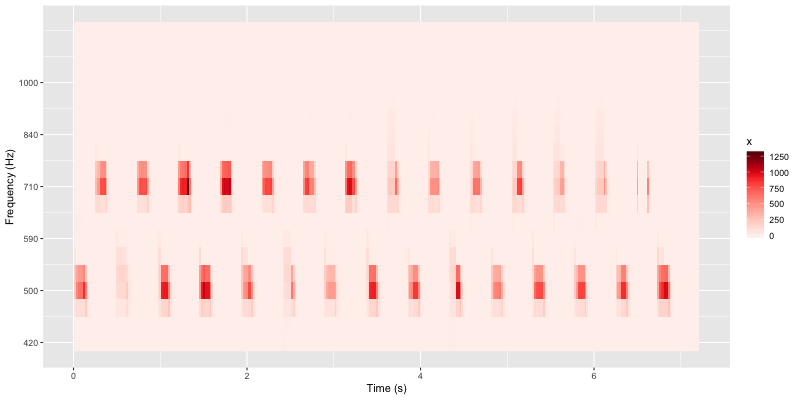

RObject{VecSxp}


In [35]:
rplot(result[2].primary_source)

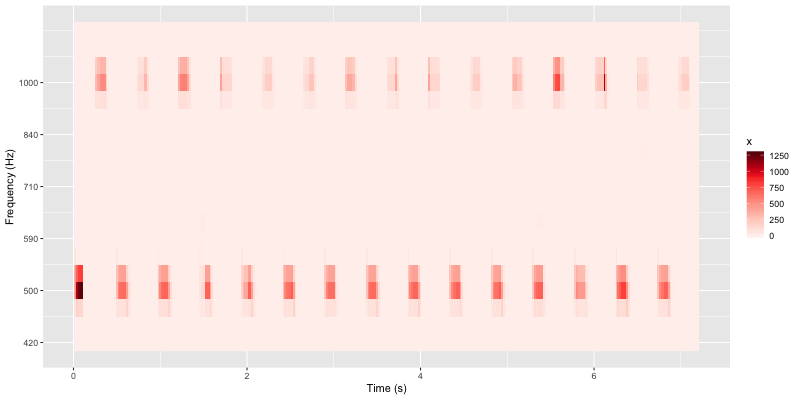

RObject{VecSxp}


In [36]:
rplot(result[3].primary_source)

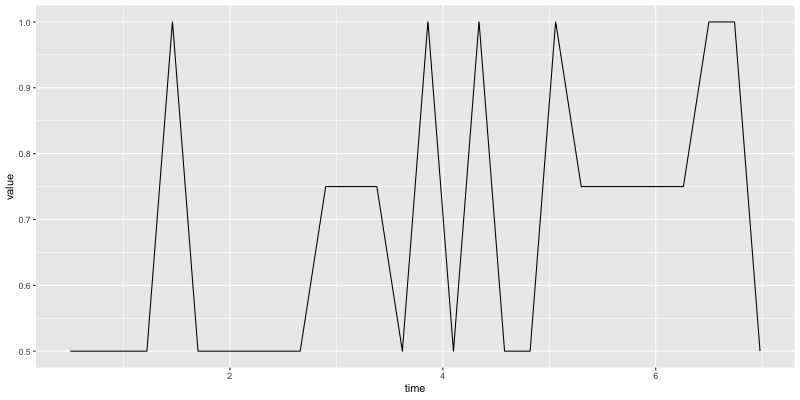

RObject{VecSxp}


In [37]:
rplot(result[1].percepts.ratio)

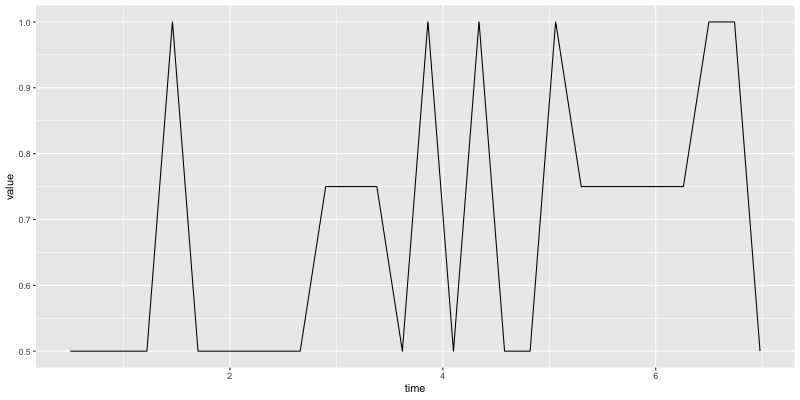

RObject{VecSxp}


In [38]:
rplot(bandwidth_ratio(decompress(compress(result[1].primary_source)),result[1].input,joinpath(srcdir,"settings.toml")))

In [57]:
println(round(Base.summarysize(compress(result[1].primary_source))/1024,digits=2)," kB")
println(round(100Base.summarysize(compress(result[1].primary_source)) / Base.summarysize(result[1].primary_source),digits=2),"% of original size")

1.21 kB
1.36% of original size


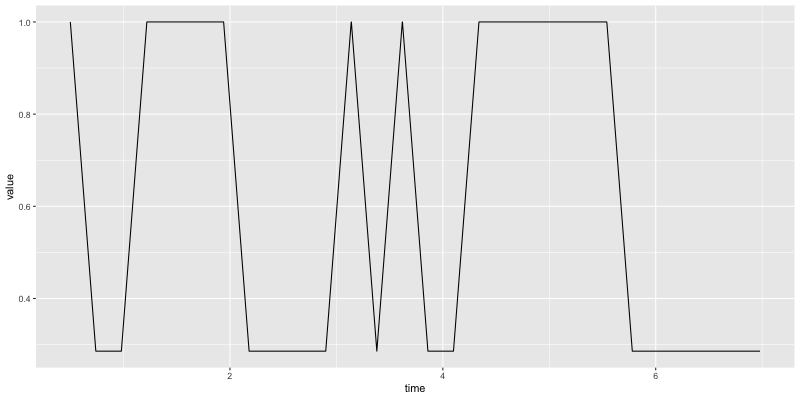

RObject{VecSxp}


In [60]:
rplot(result[2].percepts.ratio)

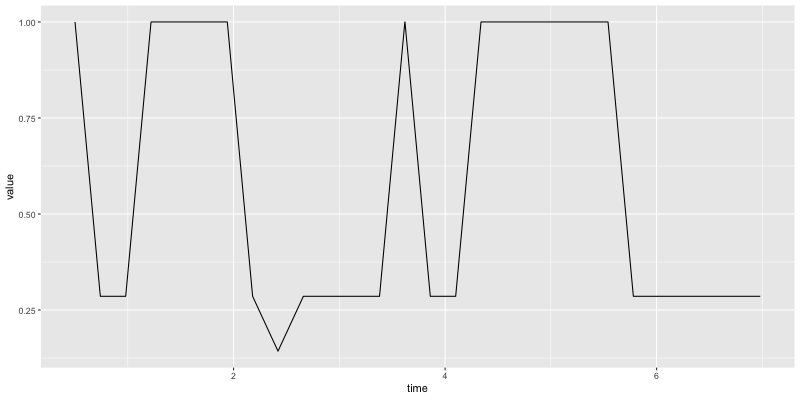

RObject{VecSxp}


In [61]:
rplot(bandwidth_ratio(decompress(compress(result[2].primary_source)),result[2].input,joinpath(srcdir,"settings.toml")))

In [62]:
println(round(Base.summarysize(compress(result[2].primary_source))/1024,digits=2)," kB")
println(round(100Base.summarysize(compress(result[2].primary_source)) / Base.summarysize(result[2].primary_source),digits=2),"% of original size")

1.2 kB
1.35% of original size


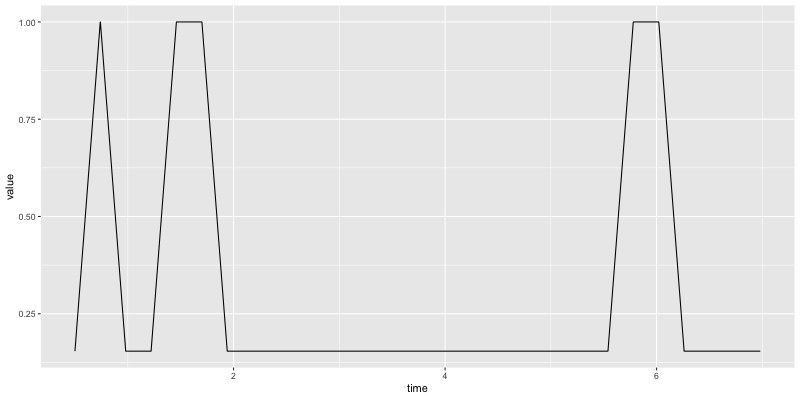

RObject{VecSxp}


In [63]:
rplot(result[3].percepts.ratio)

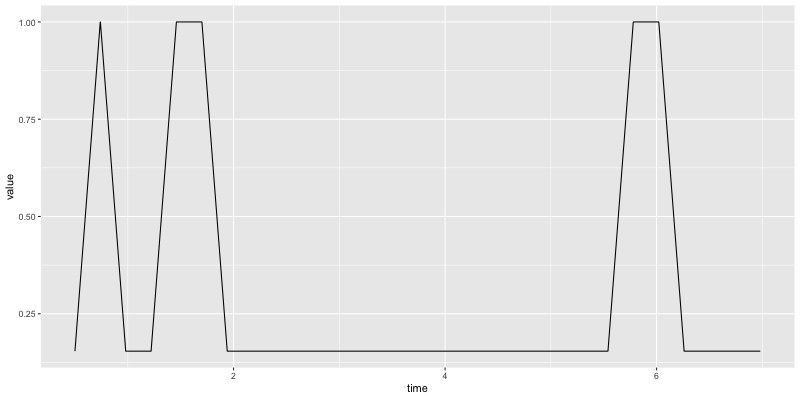

RObject{VecSxp}


In [64]:
rplot(bandwidth_ratio(decompress(compress(result[3].primary_source)),result[3].input,joinpath(srcdir,"settings.toml")))

In [65]:
println(round(Base.summarysize(compress(result[3].primary_source))/1024,digits=2)," kB")
println(round(100Base.summarysize(compress(result[3].primary_source)) / Base.summarysize(result[3].primary_source),digits=2),"% of original size")

0.84 kB
0.94% of original size
